In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from skimage import io

%matplotlib inline

In [16]:
# Load Image and transform to a 2D numpy array.
def load_image(image, n_colors=6):
    image = image / 255.
    w, h, d = original_shape = tuple(image.shape)
    image_array = np.reshape(image, (w * h, d))
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    return kmeans, labels, w, h

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

def plot(image, palette, labels, w, h):
    # Display all results, alongside original image
    plt.figure(1)
    plt.clf()
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.title('Original image')
    plt.imshow(image)

    plt.figure(2)
    plt.clf()
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.title('Quantized image')
    plt.imshow(recreate_image(palette, labels, w, h))

## Get the patriotic color palette from the hijab image

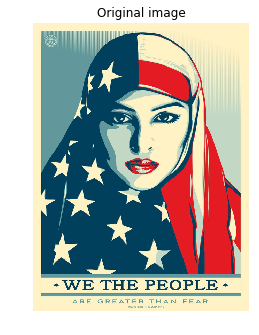

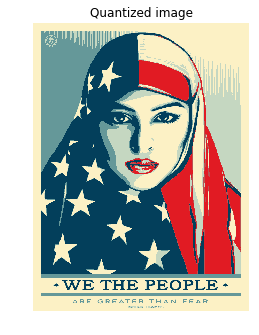

In [17]:
hijab = io.imread('http://www.middleeasteye.net/sites/default/files/styles/wysiwyg_large/public/images/We%20the%20people%20protest%20splash%20Fairey.jpeg')
kmeans, labels, w, h = load_image(hijab)
plot(hijab, kmeans.cluster_centers_, labels, w, h)

In [10]:
amerify_palette = np.array([[ 0.98849826,  0.94630995,  0.77408106],
       [ 0.01221405,  0.25053105,  0.35802015],
       [ 0.88381895,  0.10940077,  0.13908741],
       [ 0.39953682,  0.59697391,  0.6024394 ],
       [ 0.77609412,  0.84458039,  0.7606902 ],
       [ 0.73137255,  0.32235294,  0.32196078]])

def do_it(url, n=6):
    image = io.imread(url)
    kmeans, labels, w, h = load_image(image, n)
    plot(image, amerify_palette, labels, w, h)

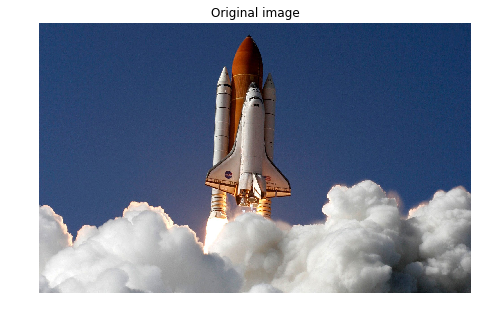

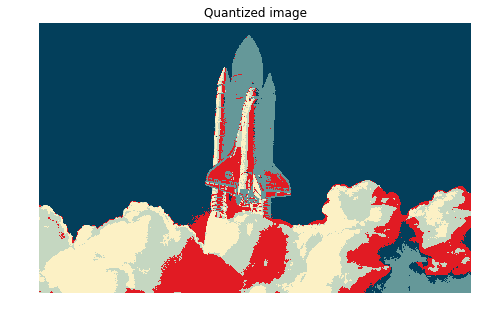

In [11]:
do_it('https://www.howitworksdaily.com/wp-content/uploads/2015/05/6938210-space-shuttle-photos.jpg', 5)

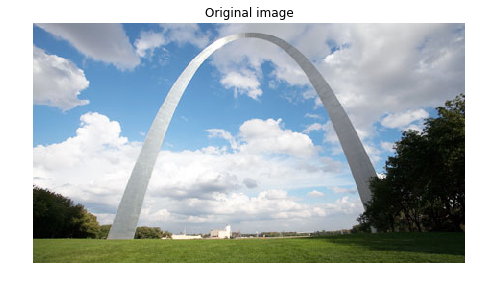

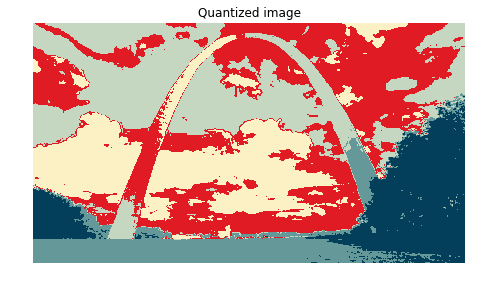

In [12]:
do_it('http://www.gatewayarch.com/getmedia/1ff79cb2-cf6b-435b-96bd-08193c94ce65/gateway-arch-photo-gallery.jpg.aspx?width=450&height=250&ext=.jpg', 5)

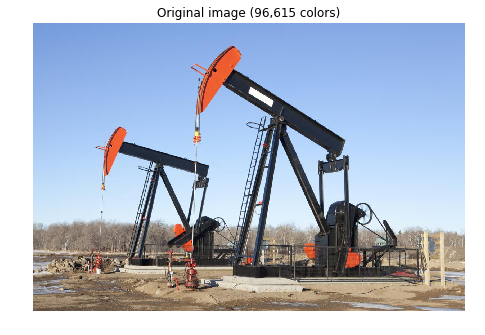

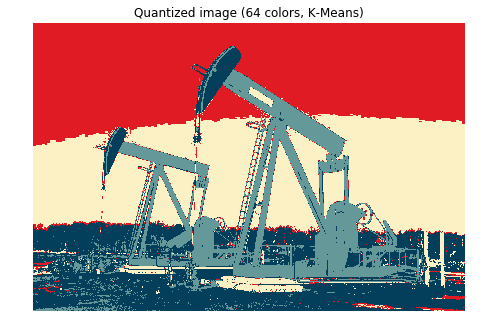

In [57]:
do_it('http://media.buzzle.com/media/images-en/photos/conceptual/technology/1200-19289125-drilling-equipment.jpg', 4)

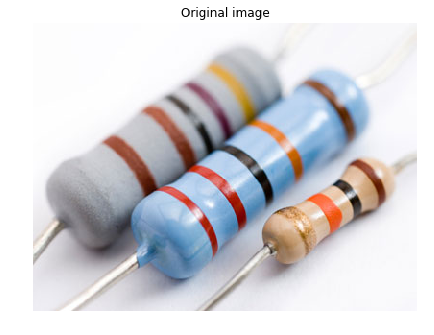

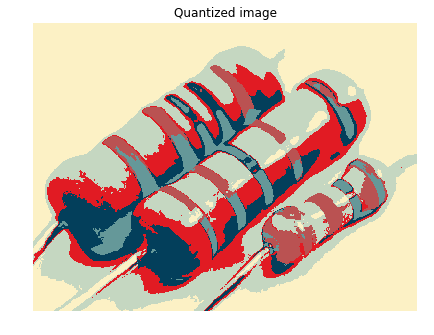

In [18]:
do_it('http://www.tesla-institute.com/images/art_001/resistors_01_electronic-components_TESLA_Institute.jpg', 6)

## Slogans ideas
Science Made This